In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import time
from datetime import datetime

# Any results you write to the current directory are saved as output.

/kaggle/input/us-border-crossing-data/Border_Crossing_Entry_Data.csv
/kaggle/input/border-crossing-entry-data/Border_Crossing_Entry_Data.csv


In [2]:
df = pd.read_csv("../input/us-border-crossing-data/Border_Crossing_Entry_Data.csv")
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [3]:
len(df)

355511

In [4]:
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  355511 non-null  object
 1   State      355511 non-null  object
 2   Port Code  355511 non-null  int64 
 3   Border     355511 non-null  object
 4   Date       355511 non-null  object
 5   Measure    355511 non-null  object
 6   Value      355511 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 19.0+ MB


In [6]:
df.keys()

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure',
       'Value'],
      dtype='object')

In [7]:
df["Border"].unique()

array(['US-Canada Border', 'US-Mexico Border'], dtype=object)

In [8]:
df["Port Name"].unique()

array(['Alcan', 'Alexandria Bay', 'Algonac', 'Ambrose', 'Andrade',
       'Antler', 'Baudette', 'Beecher Falls', 'Blaine', 'Boquillas',
       'Boundary', 'Bridgewater', 'Brownsville', 'Buffalo-Niagara Falls',
       'Calais', 'Calexico', 'Calexico East', 'Carbury',
       'Champlain-Rouses Point', 'Columbus', 'Cross Border Xpress',
       'Dalton Cache', 'Danville', 'Del Bonita', 'Del Rio', 'Derby Line',
       'Detroit', 'Douglas', 'Dunseith', 'Eagle Pass', 'Eastport',
       'El Paso', 'Ferry', 'Grand Portage', 'Fort Fairfield', 'Fort Kent',
       'Fortuna', 'Frontier', 'Hannah', 'Hansboro', 'Hidalgo',
       'Highgate Springs-Alburg', 'Houlton', 'International Falls-Ranier',
       'Jackman', 'Lancaster', 'Laredo', 'Laurier', 'Limestone',
       'Lukeville', 'Lynden', 'Madawaska', 'Maida', 'Massena',
       'Metaline Falls', 'Morgan', 'Naco', 'Neche', 'Nighthawk',
       'Nogales', 'Noonan', 'Northgate', 'Norton', 'Ogdensburg', 'Opheim',
       'Oroville', 'Otay Mesa', 'Pembina', 

In [9]:
df["Value"].mean()

28447.581399731655

In [10]:
biggest_five_value = df["Value"].nlargest(n=5)
biggest_five_value.index

Int64Index([278268, 287103, 279814, 277257, 289050], dtype='int64')

In [11]:
df.loc[biggest_five_value.index]

,Port Name,State,Port Code,Border,Date,Measure,Value
278268,El Paso,TX,2402,US-Mexico Border,3/1/2001 00:00,Personal Vehicle Passengers,4447374
287103,El Paso,TX,2402,US-Mexico Border,8/1/2000 00:00,Personal Vehicle Passengers,4291774
279814,El Paso,TX,2402,US-Mexico Border,2/1/2001 00:00,Personal Vehicle Passengers,4281175
277257,El Paso,TX,2402,US-Mexico Border,4/1/2001 00:00,Personal Vehicle Passengers,4252128
289050,El Paso,TX,2402,US-Mexico Border,6/1/2000 00:00,Personal Vehicle Passengers,4235244


In [12]:
us_mexico_border = df[df["Border"]=="US-Mexico Border"]

In [13]:
us_mexico_border.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
18,Andrade,CA,2502,US-Mexico Border,2/1/2020 00:00,Pedestrians,115655
19,Andrade,CA,2502,US-Mexico Border,2/1/2020 00:00,Personal Vehicle Passengers,82972
20,Andrade,CA,2502,US-Mexico Border,2/1/2020 00:00,Personal Vehicles,44277
49,Boquillas,TX,2410,US-Mexico Border,2/1/2020 00:00,Pedestrians,3036
66,Brownsville,TX,2301,US-Mexico Border,2/1/2020 00:00,Bus Passengers,3072


In [14]:
us_canada_border =df[df["Border"]=="US-Canada Border"]

In [15]:
us_canada_border.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


[Text(0, 0, 'Pedestrians'),
 Text(0, 0, 'Personal Vehicle Passengers'),
 Text(0, 0, 'Personal Vehicles'),
 Text(0, 0, 'Bus Passengers'),
 Text(0, 0, 'Buses'),
 Text(0, 0, 'Rail Containers Empty'),
 Text(0, 0, 'Rail Containers Full'),
 Text(0, 0, 'Trains'),
 Text(0, 0, 'Truck Containers Empty'),
 Text(0, 0, 'Truck Containers Full'),
 Text(0, 0, 'Trucks'),
 Text(0, 0, 'Train Passengers')]

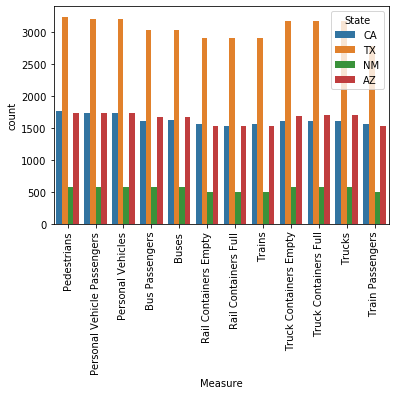

In [16]:
m = sns.countplot(x='Measure',hue="State", data=us_mexico_border)
m.set_xticklabels(m.get_xticklabels(),rotation=90)

[Text(0, 0, 'Personal Vehicle Passengers'),
 Text(0, 0, 'Personal Vehicles'),
 Text(0, 0, 'Truck Containers Empty'),
 Text(0, 0, 'Truck Containers Full'),
 Text(0, 0, 'Trucks'),
 Text(0, 0, 'Bus Passengers'),
 Text(0, 0, 'Buses'),
 Text(0, 0, 'Pedestrians'),
 Text(0, 0, 'Rail Containers Empty'),
 Text(0, 0, 'Rail Containers Full'),
 Text(0, 0, 'Train Passengers'),
 Text(0, 0, 'Trains')]

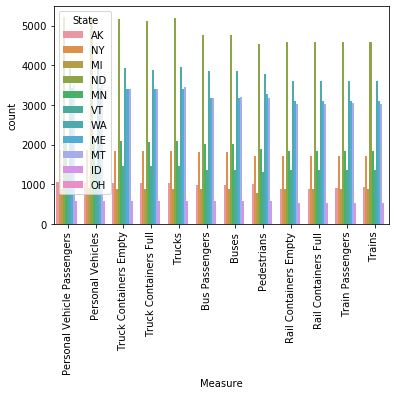

In [17]:
c = sns.countplot(x='Measure',hue="State", data=us_canada_border)
c.set_xticklabels(c.get_xticklabels(),rotation=90)

In [18]:
us_mexico_border["date"] = us_mexico_border["Date"].astype('datetime64[ns]')
us_mexico_border.date.dt.year.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


18    2020
19    2020
20    2020
49    2020
66    2020
Name: date, dtype: int64

In [19]:
us_mexico_border.date.dt.month.head()

18    2
19    2
20    2
49    2
66    2
Name: date, dtype: int64

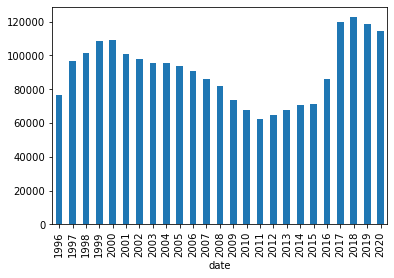

In [20]:
df_group_by_year = us_mexico_border.groupby(us_mexico_border.date.dt.year).mean()["Value"]
df_group_by_year.plot.bar()

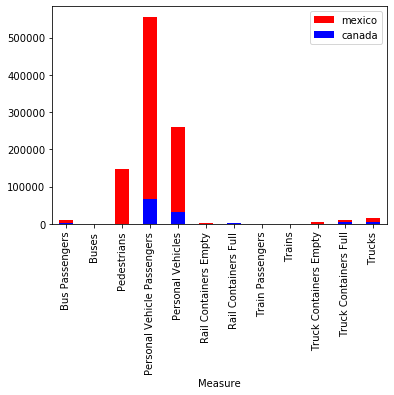

In [21]:
df_group_by_type_m = us_mexico_border.groupby(us_mexico_border.Measure).mean()["Value"]
df_group_by_type_c = us_canada_border.groupby(us_canada_border.Measure).mean()["Value"]
df_group_by_type_m.plot.bar(color="r").legend(["mexico","canada"])
df_group_by_type_c.plot.bar(color="b").legend(["mexico","canada"])


In [22]:
df_group_by_Port_Name_m = us_mexico_border.groupby(us_mexico_border["Port Name"]).mean()["Value"]

df_group_by_Port_Name.plot.bar()

NameError: name 'df_group_by_Port_Name' is not defined

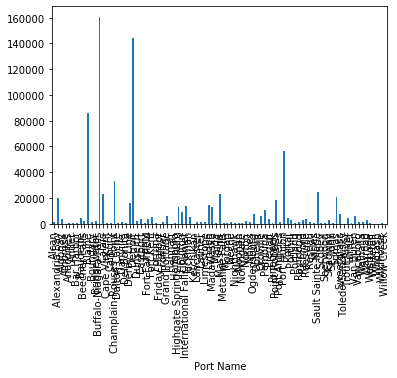

In [23]:
fig,axes = plt.subplots()
df_group_by_Port_Name_c = us_canada_border.groupby(us_canada_border["Port Name"]).mean()["Value"]

df_group_by_Port_Name_c.plot.bar(fig=0.001)


In [24]:
len(df_group_by_Port_Name_c.index)


89